# Avance 1: Análisis exploratorio y preprocesamiento de datos

## Pre-Procesamiento:

A continuación, se cargan las librerias necesarias para el trabajo a realizar:

In [0]:
import json
import csv
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')

Se carga nuestro conjunto de datos, que como se puede observar se encuentra en formato JSON, y posteriormente se visualiza:

In [0]:
with open('ICMLA.json') as file:
  data2=json.load(file)

Se puede notar del conjunto de datos que se tienen 6 atributos en los cuales se caracterizan las dimensiones de nuestros datos:

In [0]:
df2=pd.DataFrame.from_dict(json_normalize(data2))
df2.head(5)

,abstract,keywords,paper_id,session,title,year
0,Statistical word alignment models need large a...,"statistical word alignment, ensemble learning,...",1,Ensemble Methods,Ensemble Statistical and Heuristic Models for ...,2014
1,Spectral learning algorithms learn an unknown ...,"representation, spectral learning, discrete fo...",2,Ensemble Methods,Improving Spectral Learning by Using Multiple ...,2014
2,Number of defects remaining in a system provid...,"software defect prediction, particle swarm opt...",3,Ensemble Methods,Applying Swarm Ensemble Clustering Technique f...,2014
3,Not all instances in a data set are equally be...,"filtering, label noise, instance weighting",4,Ensemble Methods,Reducing the Effects of Detrimental Instances,2014
4,Learning in non-stationary environments is not...,"twitter, adaptation models, time-frequency ana...",5,Ensemble Methods,Concept Drift Awareness in Twitter Streams,2014


In [0]:
df2.shape

(448, 6)

Se quiere ver el porcentaje de datos faltantes en nuestro conjunto de datos, y claramente se observa que no hacen falta datos de los que se recolectaron por cada uno de los objetos. 

Luego de esto se observa el tipo de dato que tenemos en cada uno de los atributos.

In [0]:
## porcentaje de datos faltantes por columna en df2
df2.isnull().mean().sort_values(ascending=False)

year        0.0
title       0.0
session     0.0
paper_id    0.0
keywords    0.0
abstract    0.0
dtype: float64

In [0]:
## Tipos de datos en cada columna de df
df2.dtypes

abstract    object
keywords    object
paper_id     int64
session     object
title       object
year         int64
dtype: object

Dado que nuestro objetivo es clasificar los artículos, se procede a contar la cantidad de clases que se tienen y su frecuencia, se nota que aquel con mas frecuencia tiene 20 artículos.

In [0]:
# listar los objetos en Session de df2
clase = pd.DataFrame(df2['session'].value_counts())
clase.head(5)

,session
Machine Learning in Energy Applications,20
Machine Learning for Predictive Models in Engineering Applications,19
Machine Learning Algorithms Systems and Applications,16
Machine Learning in Information and System Security Issues,15
"Machine Learning Algorithms, Systems and Applications Workshop",11


## Pre-procesamiento

Lo que se realiza ahora es discretizar la clasificación de los artículos, para esto, se le asigna un número a cada clase y se trabajara de esta manera con las clases como números discretos.

In [0]:
dfdiscr=df2
for j in range(0,83):
  for i in range(0,448):
    if dfdiscr['session'][i]==clase.index[j]:
      dfdiscr['session'][i]=j
     


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
dfdiscr=dfdiscr.set_index('paper_id')
dfdiscr.rename(columns={'session':'classification'},inplace=True)
cols = dfdiscr.columns.tolist()
cols = cols[-2:] + cols[:-2]
dfdisc = dfdiscr[cols]




dfdisc.head(5)

,title,year,abstract,keywords,classification
paper_id,,,,,
1,Ensemble Statistical and Heuristic Models for ...,2014,Statistical word alignment models need large a...,"statistical word alignment, ensemble learning,...",10
2,Improving Spectral Learning by Using Multiple ...,2014,Spectral learning algorithms learn an unknown ...,"representation, spectral learning, discrete fo...",10
3,Applying Swarm Ensemble Clustering Technique f...,2014,Number of defects remaining in a system provid...,"software defect prediction, particle swarm opt...",10
4,Reducing the Effects of Detrimental Instances,2014,Not all instances in a data set are equally be...,"filtering, label noise, instance weighting",10
5,Concept Drift Awareness in Twitter Streams,2014,Learning in non-stationary environments is not...,"twitter, adaptation models, time-frequency ana...",10


Como nuestro objeto de estudio es el abstract, se quiere ver como influye este en la clasificación de nuestros artículos, para esto, debemos darle un tratamiento de tal manera que se pueda interpretar de manera más sencilla, un primer paso, es eliminar todos los signos de puntuación que esten presente en el, esto debido a que estamos interesados únicamente en las palabras claves más recurrentes que podamos encontrar. Una vez hecho esto, se muestra el resultado del abstract sin sus signos de puntuación.

In [0]:
def remove_punctuation(text):
  no_punt = "".join([c for c in text if c not in string.punctuation])
  return no_punt

In [0]:
#Quitar puntuación en abstracts
dfnopunt=dfdisc
dfnopunt['abstract'] = dfnopunt['abstract'].apply(lambda x: remove_punctuation(x))
abstr=dfnopunt['abstract']
abstr.head(5)

paper_id
1    Statistical word alignment models need large a...
2    Spectral learning algorithms learn an unknown ...
3    Number of defects remaining in a system provid...
4    Not all instances in a data set are equally be...
5    Learning in nonstationary environments is not ...
Name: abstract, dtype: object

Otro aspecto importante a tener en cuenta es que hay palabras que no son relevantes a la hora de tratar de buscar nuestras palabras claves, estas palabras las denominaremos como Stop_words, y el tratamiento que les daremos es eliminarlas y únicamente trabajar con aquellas que me puedan dar información más relevante del artículo, obteniendo así vector con palabras por cada abstract.

In [0]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [0]:
nltk.download('stopwords')
abstract=dfdisc['abstract'].apply(text_process)
abstract.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


paper_id
1    [Statistical, word, alignment, models, need, l...
2    [Spectral, learning, algorithms, learn, unknow...
3    [Number, defects, remaining, system, provides,...
4    [instances, data, set, equally, beneficial, in...
5    [Learning, nonstationary, environments, easy, ...
Name: abstract, dtype: object

De esta manera, se obtiene el dataset completamente transforado y con los atributos que realmente nos interesan, además de tener los datos en la estructura en la que se nos facilitará trabajarlos.

In [0]:
dfdisc['year']=abstract.apply(len)
dfdisc['abstract']=abstract
dfdisc.rename(columns={'year':'abstract_length'},inplace=True)
dfdisc.head(5)

,title,abstract_length,abstract,keywords,classification
paper_id,,,,,
1,Ensemble Statistical and Heuristic Models for ...,77,"[Statistical, word, alignment, models, need, l...","statistical word alignment, ensemble learning,...",10
2,Improving Spectral Learning by Using Multiple ...,61,"[Spectral, learning, algorithms, learn, unknow...","representation, spectral learning, discrete fo...",10
3,Applying Swarm Ensemble Clustering Technique f...,75,"[Number, defects, remaining, system, provides,...","software defect prediction, particle swarm opt...",10
4,Reducing the Effects of Detrimental Instances,110,"[instances, data, set, equally, beneficial, in...","filtering, label noise, instance weighting",10
5,Concept Drift Awareness in Twitter Streams,107,"[Learning, nonstationary, environments, easy, ...","twitter, adaptation models, time-frequency ana...",10


Algunos cálculos adicionales, que nos podrán servir para no tener en cuenta algunos objetos del dataset, es la cantidad de palabras que tengamos en cada abstract, acá por ejemplo vemos lo alejado que esta el que mas palabras contiene en su abstract (191) de la media que son aproximadamente 96. Esto nos ayudará a visualizar un poco mejor los datos con los que se cuenta.

In [0]:
dfdisc.describe()

,abstract_length
count,448.000000
mean,96.837054
std,29.036547
min,30.000000
25%,76.000000
50%,92.000000
75%,115.000000
max,191.000000


En este caso, se hace la descripción de los datos, según el número de palabras que se tengan por clase, acá solo se muestran las primeras  clases pero se puede ver algunos rasgos significativos en estos y como cambia la media de palabras en el abstract entre clase y clase.

In [0]:
clase=dfdisc.groupby('classification').describe()
clase.head()

abstract_length                         ...                      
                         count        mean        std  ...    50%     75%    max
classification                                         ...                      
0                         20.0   93.150000  25.615117  ...   85.5   96.75  149.0
1                         19.0  106.947368  22.483262  ...  103.0  125.00  158.0
2                         16.0   77.000000  30.313913  ...   71.5   89.25  172.0
3                         15.0  106.466667  25.963894  ...  107.0  117.50  151.0
4                         11.0   97.636364  36.415032  ...   85.0  125.50  154.0

[5 rows x 8 columns]

Por último, una herramienta de visualiación para el número de palabras por abstract, nos muestra que en su gran mayoría, los articulos cuentan con entre 70 y 110 palabras.

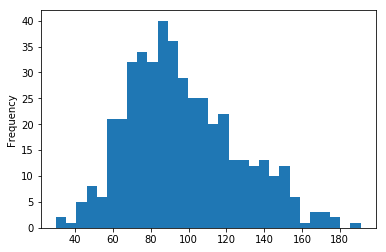

In [0]:
dfdisc['abstract_length'].plot.hist(bins=30)

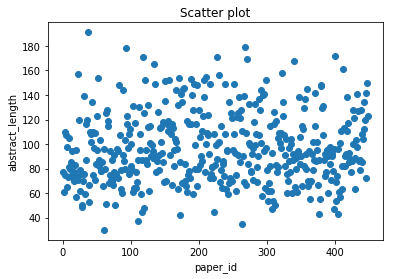

In [0]:
plt.scatter(dfdisc.index, dfdisc['abstract_length'])
plt.title('Scatter plot')
plt.xlabel('paper_id')
plt.ylabel('abstract_length')
plt.show()